In [1]:
from src.utils import fetch_telecom_data
from src.preprocessing import preprocess_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.preprocessing import handle_outliers_log, handle_outliers_median, handle_outliers_mean_mode

# Load the data from the database

In [2]:
# Load the data
df = fetch_telecom_data()

In [3]:
# convert the following features to categorical

df['IMSI'] = df['IMSI'].astype('category')
df['MSISDN/Number'] = df['MSISDN/Number'].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   Bearer Id                                 149010 non-null  float64 
 1   Start                                     150000 non-null  object  
 2   Start ms                                  150000 non-null  float64 
 3   End                                       150000 non-null  object  
 4   End ms                                    150000 non-null  float64 
 5   Dur. (ms)                                 150000 non-null  float64 
 6   IMSI                                      149431 non-null  category
 7   MSISDN/Number                             148935 non-null  category
 8   IMEI                                      149429 non-null  float64 
 9   Last Location Name                        148848 non-null  object  
 10  Avg RTT 

# Preprocess the data:
- (treat missing & outliers by replacing by the mean or the mode of the corresponding variable)

In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Check for outliers

In [6]:
# Define the columns
timestamp_cols = ['Start', 'End']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Type', 'Handset Manufacturer']


In [7]:
# Handle outliers in numeric features
df_preprocessed = preprocess_data(df, categorical_features, numerical_features, timestamp_cols)

In [8]:
df_preprocessed.head()

,Bearer Id,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),IMSI,MSISDN/Number,IMEI,Last Location Name,Handset Type,Handset Manufacturer
0,1.028035,0.829263,0.614047,0.007061,-0.188482,-2.279256e-01,-0.960585,-0.733343,-1.670929e-15,0.0,...,-1.078650,0.298900,-0.336519,-0.342155,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,Samsung Galaxy A5 Sm-A520F,Samsung
1,1.028035,-0.867422,0.487946,0.007061,0.731606,-2.279256e-01,-1.068281,-0.979640,-1.670929e-15,0.0,...,0.529776,1.070013,1.079943,0.776002,208201909211140.0,33681854413.0,35794009006359.0,L77566A,Samsung Galaxy J5 (Sm-J530),Samsung
2,1.028035,0.208579,0.592330,0.007061,0.000000,-4.744955e-16,-1.345392,-1.458541,-1.670929e-15,0.0,...,0.172261,-0.763499,-1.362554,-0.489683,208200314458056.0,33760627129.0,35281510359387.0,D42335A,Samsung Galaxy A8 (2018),Samsung
3,1.028035,0.170823,-1.314030,0.007061,0.000000,-4.744955e-16,-0.764265,-0.733343,-1.670929e-15,0.0,...,1.034500,0.835962,0.275110,1.161628,208201402342131.0,33750343200.0,35356610164913.0,T21824A,Huawei B528S-23A,Apple
4,1.028035,0.386274,1.135529,0.007061,0.000000,-4.744955e-16,-1.345392,-1.458541,-1.670929e-15,0.0,...,0.593178,0.956091,-0.159481,0.569982,208201401415120.0,33699795932.0,35407009745539.0,D88865A,Samsung Sm-G390F,Samsung


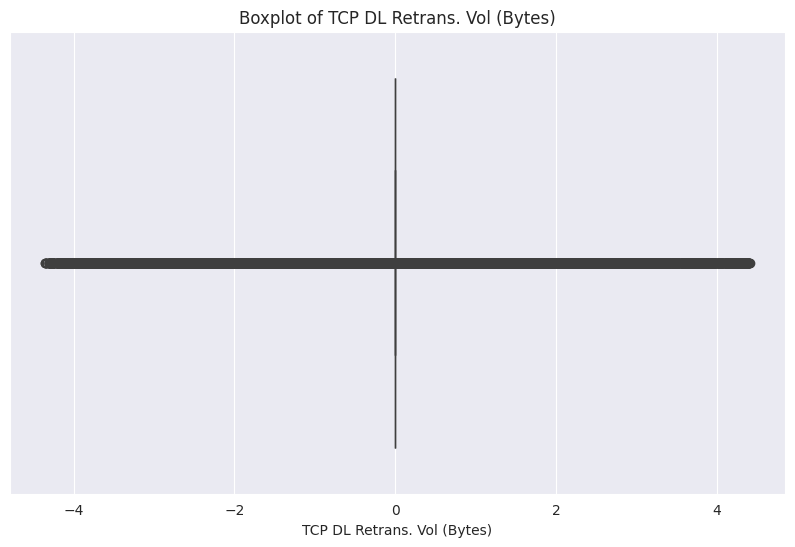

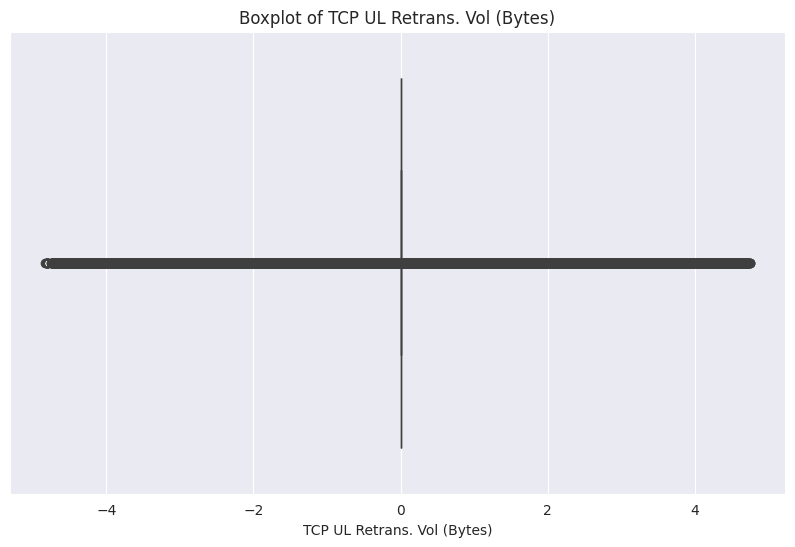

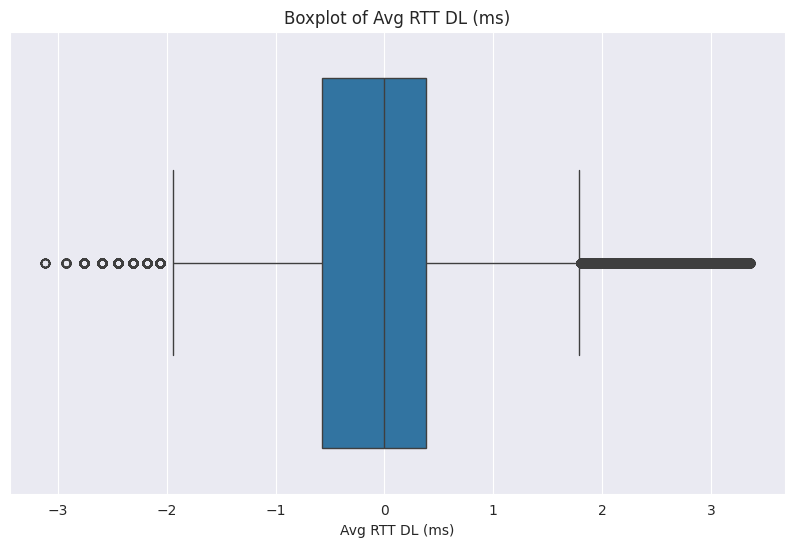

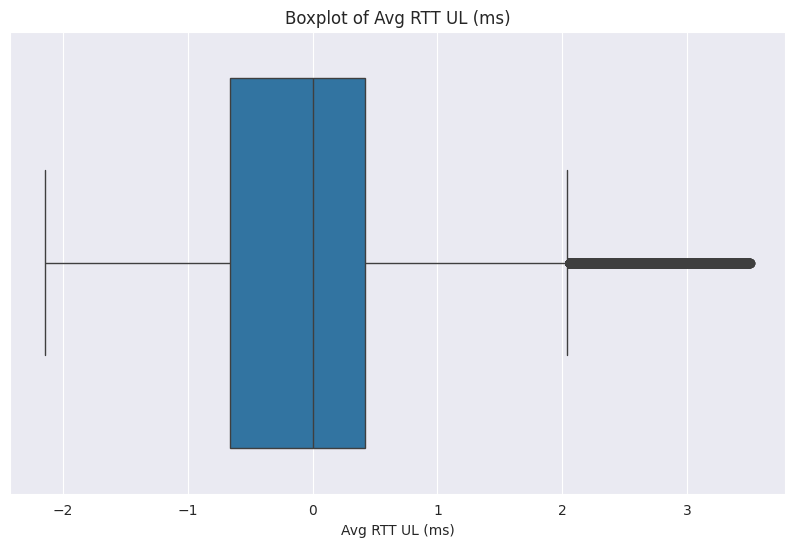

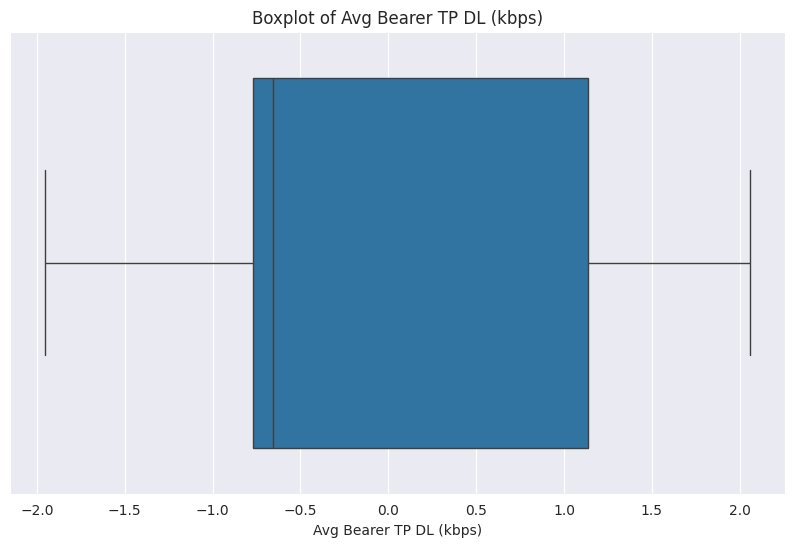

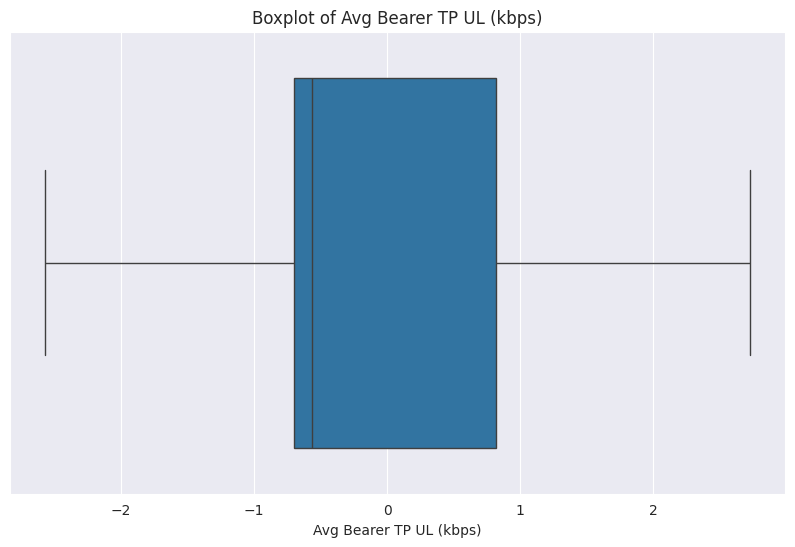

In [9]:
# Define the columns to plot
columns_to_plot = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Plot boxplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    

# Save the preprocessed data

In [10]:
# Save the preprocessed data
from src.utils import save_data_to_db
save_data_to_db(df_preprocessed, 'clean_data')

In [35]:
from src.utils import fetch_data_from_db_table
clean = fetch_data_from_db_table('clean_data')
df_preprocessed = clean

# Task 4.1
## Aggregate , per customer, the following information:
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput


In [21]:
# Group the data by 'MSISDN/Number' and calculate the mean of the specified columns
df_grouped = df_preprocessed.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
})

# Get the most frequent 'Handset Type' for each customer
most_frequent_handset = df_preprocessed.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.value_counts().index[0])

In [22]:
# Add the most frequent 'Handset Type' to the grouped data
df_grouped['Handset Type'] = most_frequent_handset

df_grouped.head()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
MSISDN/Number,,,,,,,
3.360100e+10,-1.670929e-15,0.000000,0.002529,-2.142365e+00,-0.817069,-0.790132,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,-1.670929e-15,0.000000,-0.891158,-1.401759e+00,-0.737670,-0.663632,Apple iPhone 7 (A1778)
3.360100e+10,-1.670929e-15,0.000000,0.000000,-4.744955e-16,-0.737670,-0.682543,Huawei B528S-23A
3.360101e+10,-2.717897e+00,0.000000,0.857964,8.200599e-01,-0.290699,-0.733343,Apple iPhone 5S (A1457)
3.360101e+10,7.759117e-01,0.005025,0.145237,-1.185145e+00,0.199304,0.666328,Apple iPhone Se (A1723)


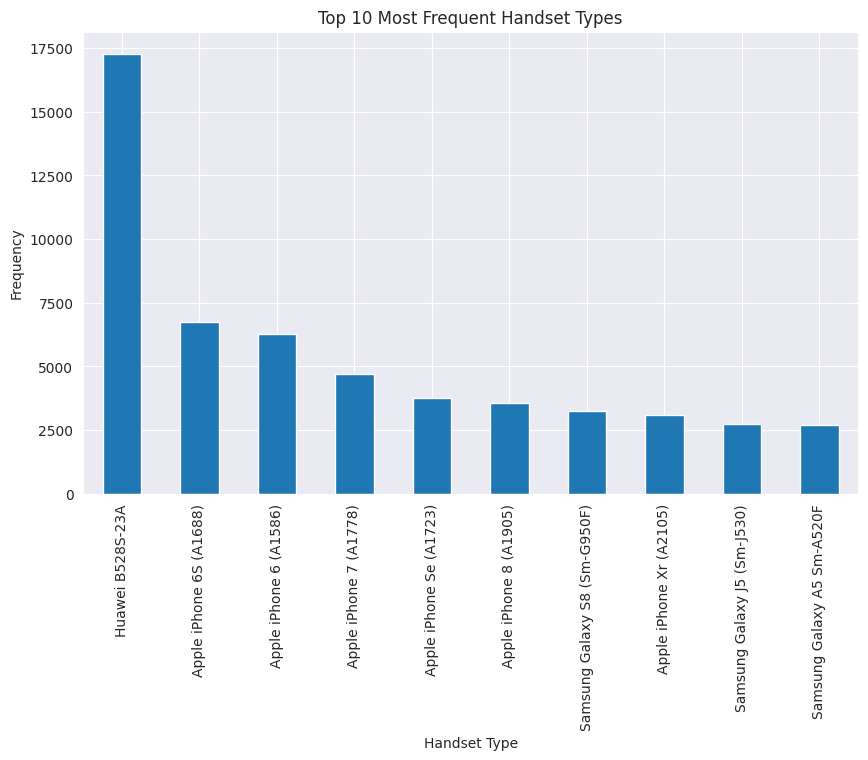

In [36]:
# Plot for visualization of most frequent handset type of each customer, top 10
plt.figure(figsize=(10, 6))
df_grouped['Handset Type'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
plt.show()



# Task 4.2
Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.


In [37]:
import pandas as pd

# Define the columns to analyze
columns_to_analyze = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Convert the columns to numeric data type
for column in columns_to_analyze:
    df_preprocessed[column] = pd.to_numeric(df_preprocessed[column], errors='coerce')

# Now try to print the top 10, bottom 10, and most frequent 10 values again
for column in columns_to_analyze:
    if df_preprocessed[column].dtype != 'object':
        print(f"Column: {column}")
        print("Top 10 values:")
        print(df_preprocessed[column].nlargest(10))
        print("Bottom 10 values:")
        print(df_preprocessed[column].nsmallest(10))
        print("Most frequent 10 values:")
        print(df_preprocessed[column].value_counts().nlargest(10))
        print("\n")

Column: TCP DL Retrans. Vol (Bytes)
Top 10 values:
122581    4.412214
141006    4.404595
140926    4.404463
36887     4.400169
119434    4.397616
68186     4.392311
122328    4.391851
120962    4.391179
78843     4.390973
37890     4.390200
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 values:
59599    -4.352792
118473   -4.352792
19071    -4.338752
21869    -4.338752
24249    -4.338752
101759   -4.325118
14107    -4.311869
23628    -4.311869
24420    -4.311869
89494    -4.311869
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most frequent 10 values:
TCP DL Retrans. Vol (Bytes)
-1.670929e-15    88146
-2.613918e+00      433
-2.288091e+00      219
-4.274223e+00      200
-3.865493e+00      192
-2.618178e+00      156
-3.034735e+00      133
-2.097449e+00      114
-3.954287e+00      108
-1.962175e+00      102
Name: count, dtype: int64


Column: TCP UL Retrans. Vol (Bytes)
Top 10 values:
77469     4.747853
121904    4.747190
120386    4.744431
42178     4.734405
47522     4.7

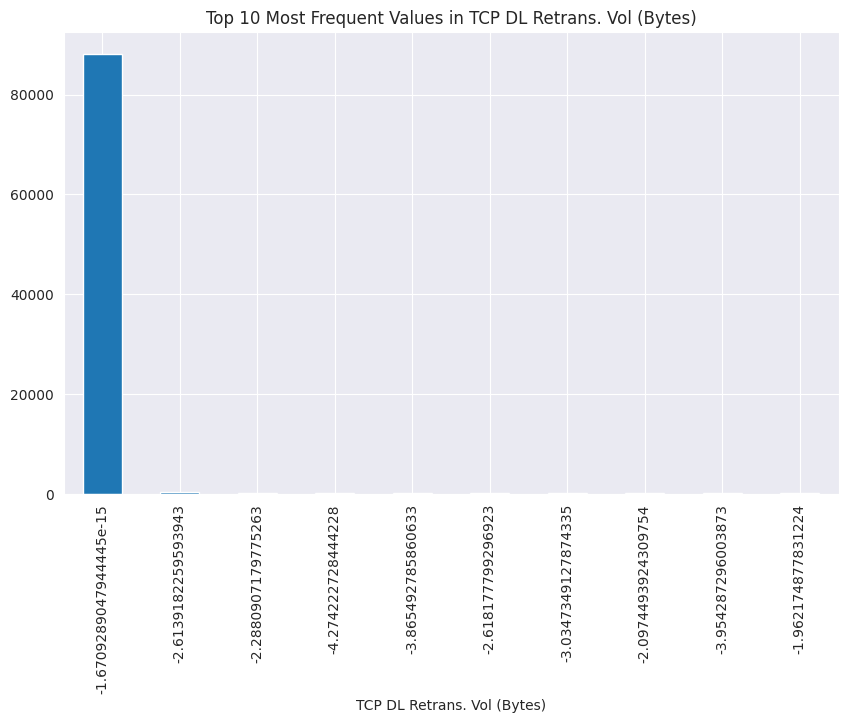

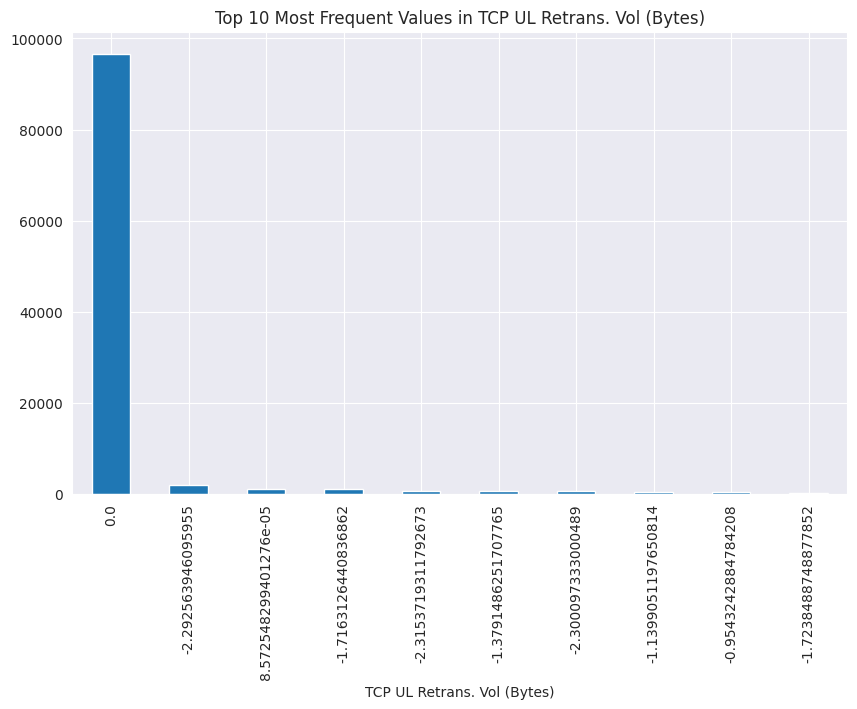

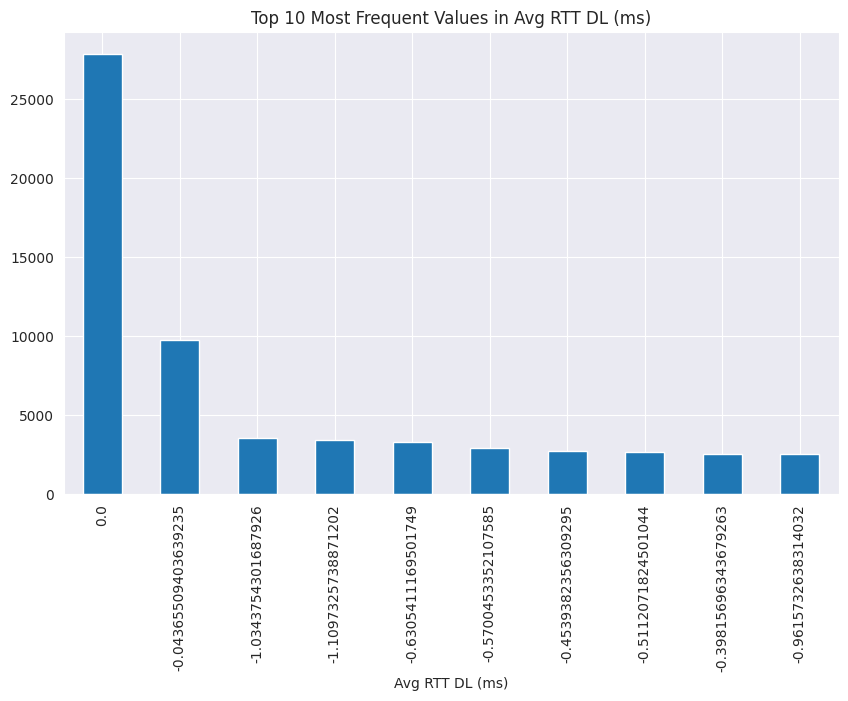

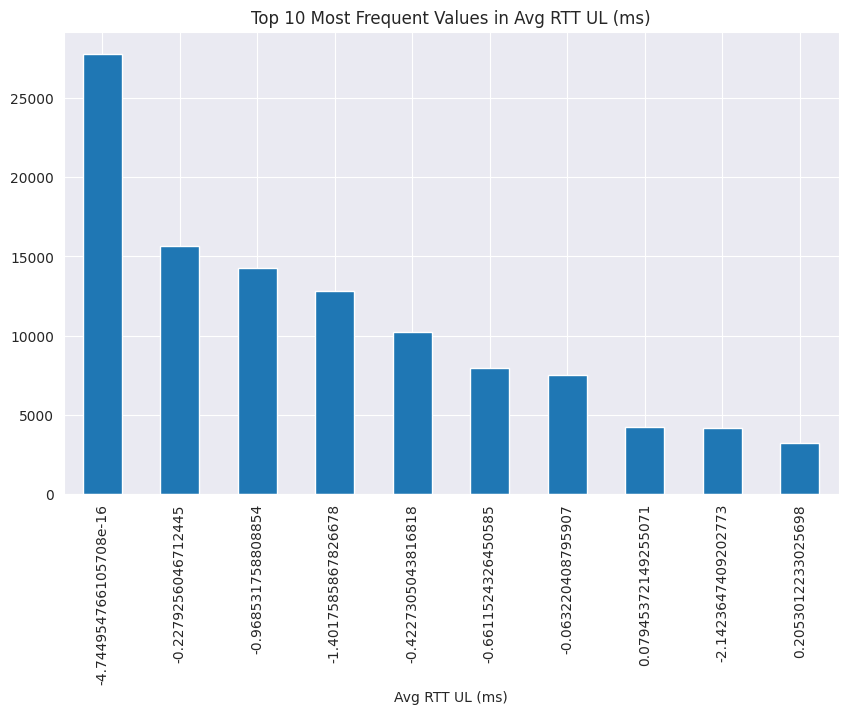

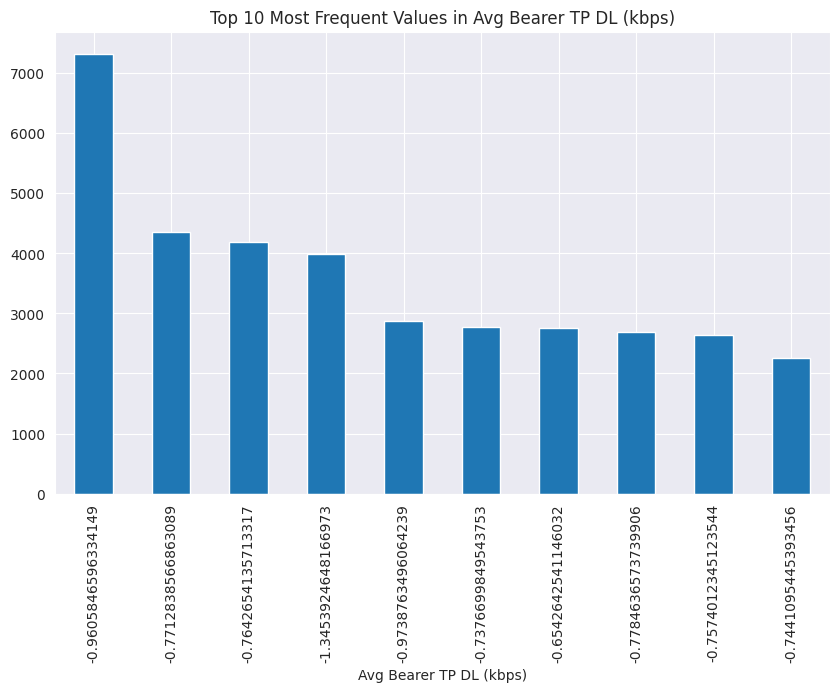

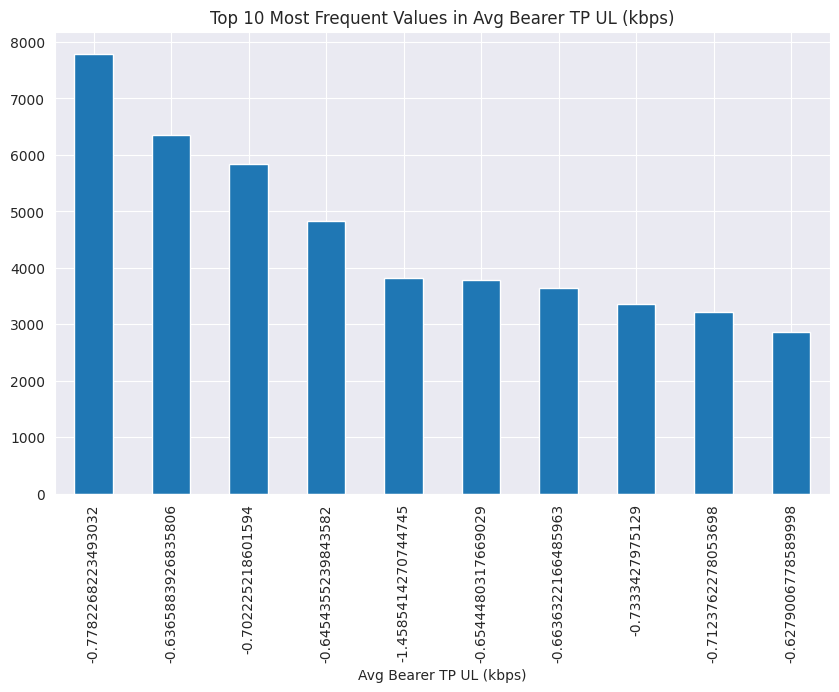

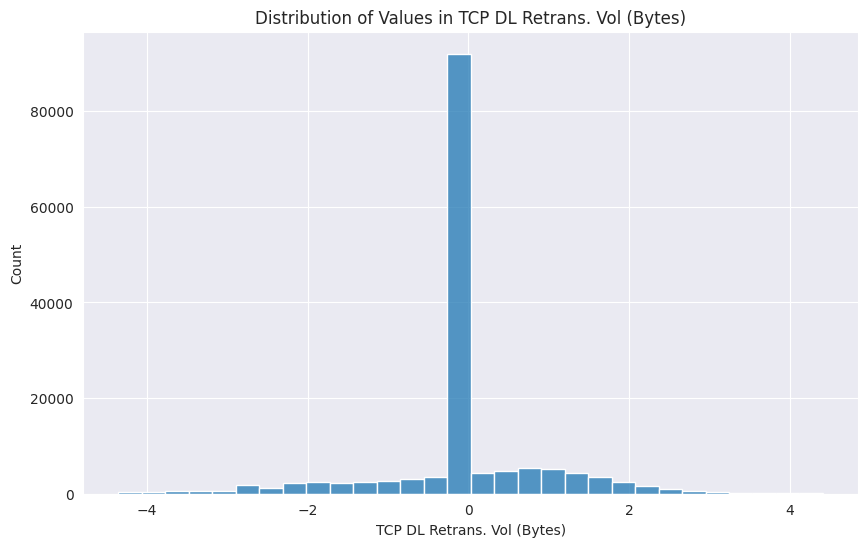

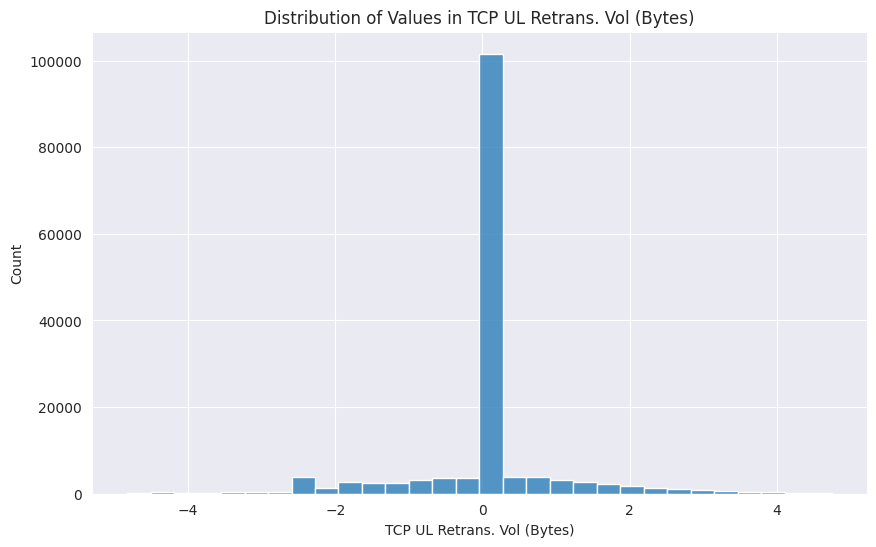

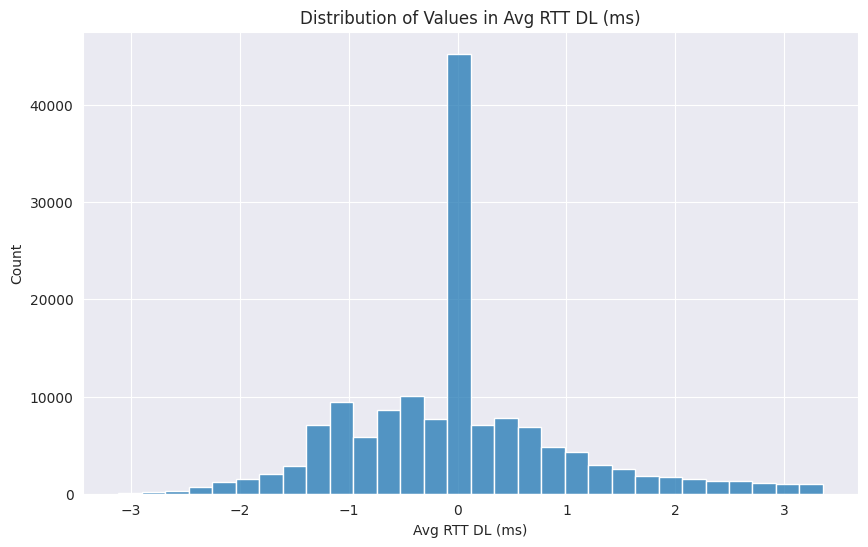

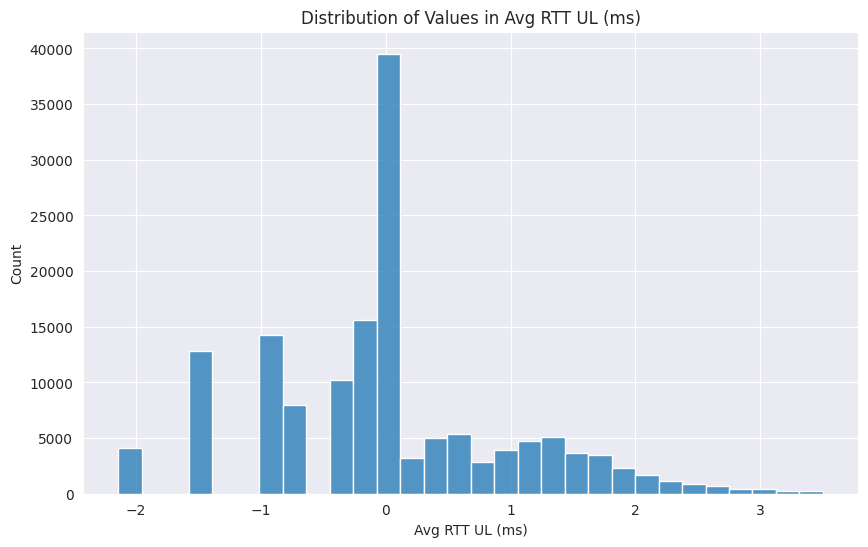

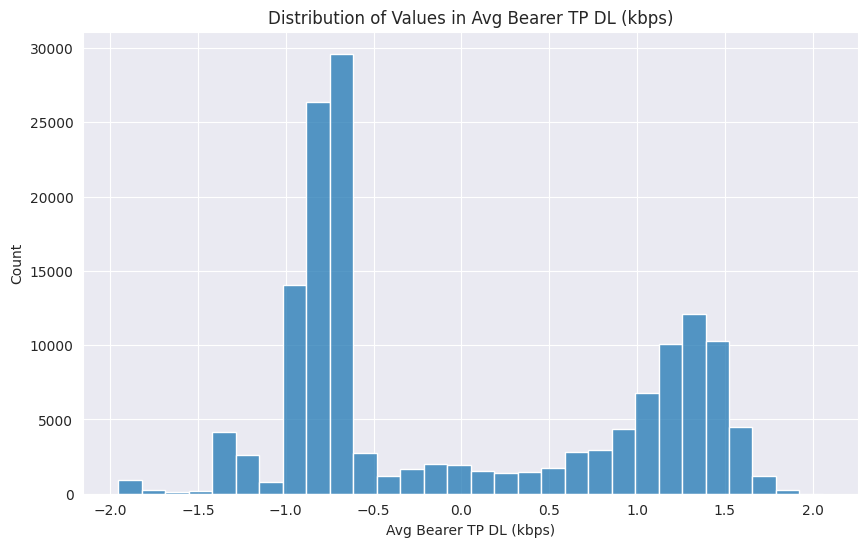

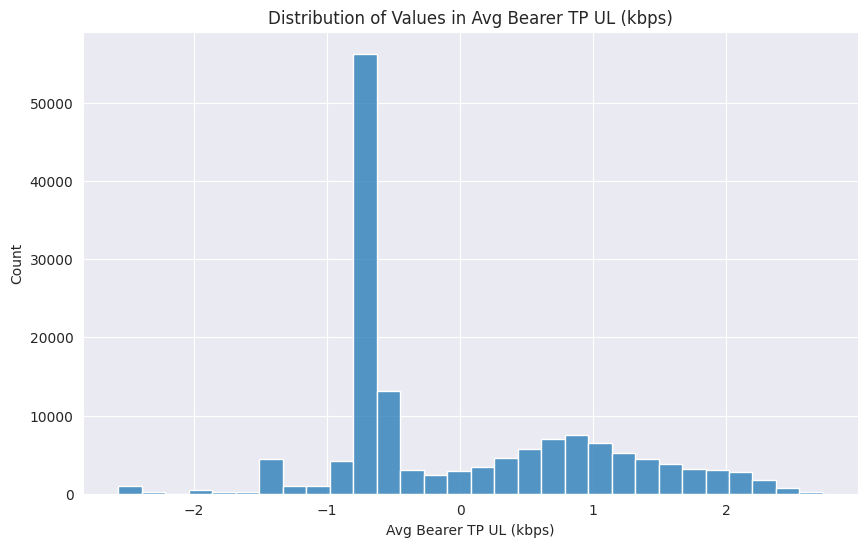

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to analyze
columns_to_analyze = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Create bar plots for the top 10, bottom 10, and most frequent 10 values for each column
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    df_preprocessed[column].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.show()

# Create histograms for each column
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_preprocessed[column], bins=30)
    plt.title(f'Distribution of Values in {column}')
    plt.show()

# Create scatter plots for each pair of columns
for i in range(len(columns_to_analyze)):
    for j in range(i+1, len(columns_to_analyze)):
        plt.figure(figsize=(10, 6))

# Task 4.3
Compute & report:
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.


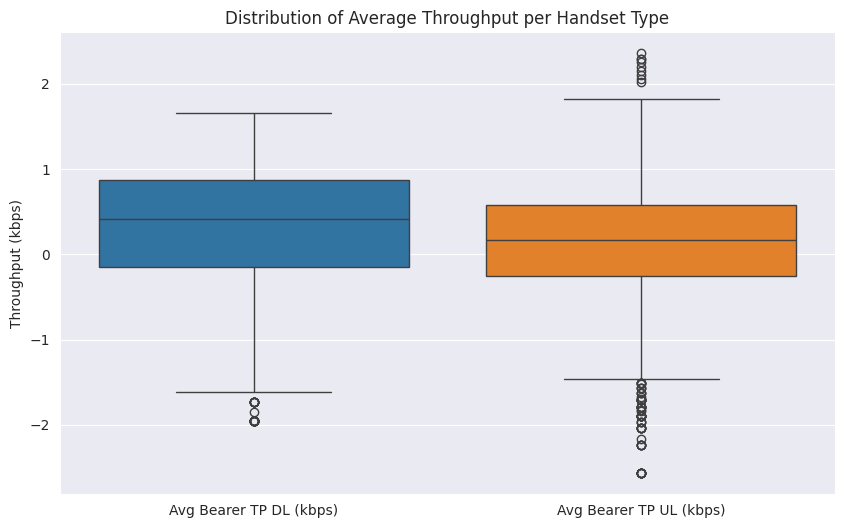

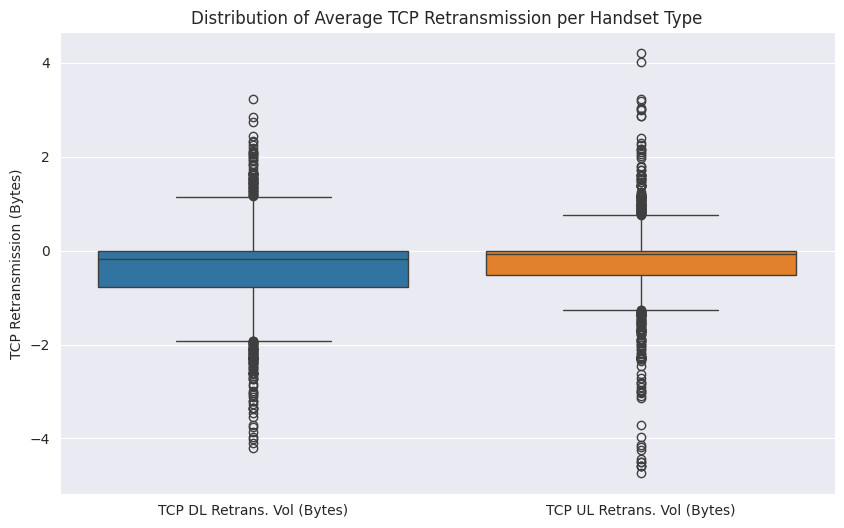

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Handset Type' and calculate the mean of the specified columns
df_grouped_handset = df_preprocessed.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
})

# Plot the distribution of the average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped_handset[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']])
plt.title('Distribution of Average Throughput per Handset Type')
plt.ylabel('Throughput (kbps)')
plt.show()

# Plot the distribution of the average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped_handset[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']])
plt.title('Distribution of Average TCP Retransmission per Handset Type')
plt.ylabel('TCP Retransmission (Bytes)')
plt.show()

# Task 4.4
Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features
features = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
df_cluster = df_preprocessed[features]

# Standardize the features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cluster_scaled)

# Add the cluster labels to the original dataframe
df_preprocessed['cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(3):
    print(f"Cluster {i}:")
    print(df_preprocessed[df_preprocessed['cluster'] == i][features].describe())
    print("\n")

Cluster 0:
       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                 8.707500e+04                 87075.000000   
mean                 -1.887228e-02                    -0.029192   
std                   2.419545e-01                     0.287575   
min                  -4.352792e+00                    -4.389427   
25%                  -1.670929e-15                     0.000000   
50%                  -1.670929e-15                     0.000000   
75%                  -1.670929e-15                     0.000000   
max                   2.990815e+00                     4.534016   

       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count     87075.000000     8.707500e+04             87075.000000   
mean         -0.330321    -4.493705e-01                -0.785973   
std           0.788800     7.215245e-01                 0.310325   
min          -3.116123    -2.142365e+00                -1.953115   
25%          -0.891158    -9.685318e-01      